# Identifying Asset Pairs for Pairs Trading in Python

## Pairs Trading

Unfortunately, simple mean reversion is hard to find. E.g. in stocks this would mean, that the **company does not grow.** But we may be able to construct a tradeable stationary time series. 

In a pairs trade the **goal** is to find two assets, such that a linear combination of the assets is stationary. In math that amounts to finding two time series $X_t$ and $Y_t$ such that a $\beta$ exists with $X_t= \beta Y_t+e_t$ and the $e_t$ stationary. If this holds, then the series $X_t$ and $Y_t$ are called cointegrated.


### Identyfying Stocks

In the real world, that amounts to finding two companies which do nearly the **same, so the same economical factors apply**. 

- Two companies which produce the **same product** and are in the **same country** are affected by the **same economical factors.** 

- But **if one of them has a failure in their supply chain**, it may recover and thus we have a good chance of a cointegrating relationship. A bunch of oil companies may be a good pick. Or what about airlines.

### Picking Random Stocks

Wec could pick random stocks for cointegration. This will sometimes not work, since if we work with a p-value of 5%, every 20th detected cointegration relationship will be pure garbage.

### How do we test cointegration?

If we knew the $e_t$, then we could run an augmented dickey fuller test:
- Unfortunately, we do not know them. 

**Thus, the traditional approach, also called the Engle-Granger two step method:**

is to first estimate the process $e_t$ using, e.g., ordinary least squares and then testing the residuals for stationarity.

# Engle-Granger on Non-Cointegrating Pair (KO & PEP)

## 1. Retrieve Data and Analyse Correlation Plot

### a. Retreive Data

In [20]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.tsa.stattools as ts

**Specify Timeframe:**

- Date and apply the timeframe to the retreived data

In [5]:
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2014, 1, 27)

## Get prices of Pepsi and Coca-Cola
ko_prices = web.DataReader("KO", "yahoo", start, end)
pep_prices = web.DataReader("PEP", "yahoo", start, end)

# Display the first rows of Coca-Cola Prices
ko_prices.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,32.939999,32.555000,32.939999,32.610001,18945600.0,23.681936
2011-01-04,32.595001,31.905001,32.509998,31.934999,27940400.0,23.191738
2011-01-05,31.975000,31.430000,31.895000,31.745001,34379000.0,23.053753
2011-01-06,31.830000,31.415001,31.809999,31.514999,21712400.0,22.886724
2011-01-07,31.500000,31.280001,31.389999,31.459999,16592800.0,22.846783


**Get Adjusted Closing Prices:**

In [7]:
ko_close = ko_prices["Adj Close"]
pep_close = pep_prices["Adj Close"]

### c. Graph the scatterplot

to check if the two stocks could be cointegrated. If they are, we expect to see the points clustered around a line.

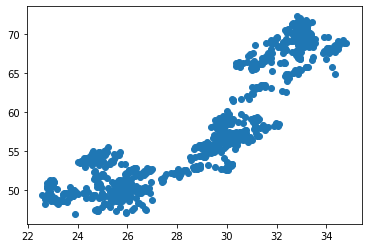

In [12]:
plt.scatter(ko_close, pep_close)
plt.show()

### d. Fit a line with linear regression:

$PEP = \beta * KO + \alpha + e_t$

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ko_close, pep_close)
print("slope: " + str(slope) + 
     "\nintercept: " + str(intercept) +
     "\nr_value: " + str(r_value) + 
     "\np_value: " + str(p_value)  +
     "\nstd_err: " + str(std_err))

slope: 1.9670529523673106
intercept: 0.9154497064014677
r_value: 0.886627020320215
p_value: 9.357375790078777e-260
std_err: 0.037000681591583734


**results:** 

The p-value is very small so we can reject the null of no relationship

**Plotting:**

Fit a straight line $y = mx + c$ by getting two random points off of $x$

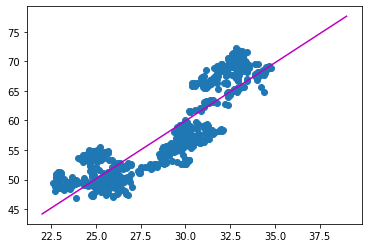

In [16]:
plt.scatter(ko_close, pep_close)

# Get the x-axis values of the previous scatter plot
x=[22,39]

# Loop over the two values of x for the regression
plt.plot(x,[slope*x_i + intercept for x_i in x], color="m")

plt.show()

### e. Compute the Residual

If the error term is stationary $\Rightarrow$ KO and PEP are cointegrated.

$e_t = PEP - \beta * KO - \alpha $

C:\Users\andrea.chello\.conda\envs\Data Science\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


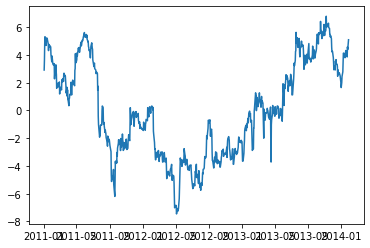

In [18]:
error = pep_close - slope*ko_close - intercept
plt.plot(error)
plt.show()

**Result:** 

It is not clear if the residuals are truly stationary as there is an upward trend to the series

## 2. Test For Stationarity

### Implement Dickey Fuller Test

$h_0: \text{Unit Root}$

In [21]:
ts.adfuller(error,1)

(-1.6856640496586026,
 0.4385135138517139,
 0,
 770,
 {'1%': -3.4388710830827125,
  '5%': -2.8653008652386576,
  '10%': -2.568772659807725},
 1003.1648051920206)

At p-value: 0.4385135138517139, we do NOT reject the null therefore we have a unit root process in the residuals meaning there is no cointegrating relationship between KO and PEP.

# Engle-Granger Test for Cointegrated Pairs

There is an iShares MSCI Australia and an iShares MSCI Canada. These are two ETFs which track the economy of Australia, respectively Canada. Their ticker symbols are EWA and EWC. We will test their cointegration.

## 1. Retrieve Data and Analyse the Correlation Graph

In [23]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.tsa.stattools as ts

### Adjusted Closing Prices Plot

Non-stationary

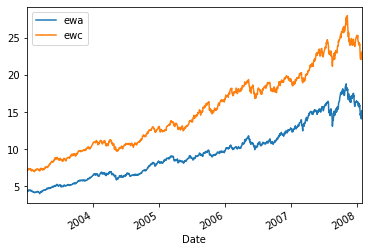

In [28]:
start = datetime.datetime(2003, 1, 1)
end = datetime.datetime(2008, 1, 27)
ewa_prices = web.DataReader("EWA", "yahoo", start, end)
ewc_prices = web.DataReader("EWC", "yahoo", start, end)
ewa_close = ewa_prices["Adj Close"]
ewc_close = ewc_prices["Adj Close"]
ewa_close.plot(label="ewa", legend=True)
ewc_close.plot(label="ewc", legend = True)
plt.show()

### Plot the Correlation Graph

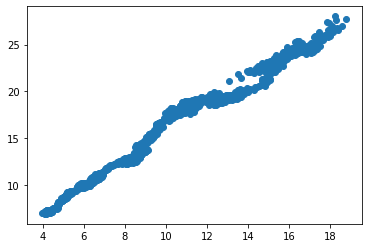

In [26]:
plt.scatter(ewa_close, ewc_close)
plt.show()

### Fit Regression Line

<p style="text-align:center;"> $y_t  = \beta x_t + \alpha$ </p>

In [49]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ewa_close, ewc_close)

print("slope {}, intercept {}, r_value {}, p_value {}, std_err {}".format(
    slope, intercept, r_value, p_value, std_err))

slope 1.4130433275269065, intercept 1.6807701738392424, r_value 0.9893862706460588, p_value 0.0, std_err 0.0058165968000750985


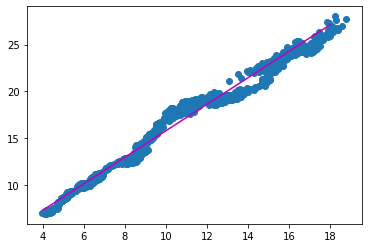

In [52]:
plt.scatter(ewa_close, ewc_close)
x = [4,18]
# plot(x,y)
plt.plot(x, [slope * x_i + intercept for x_i in x], color = "m")
plt.show()

### Get Residuals

<p style="text-align:center;"> $e_t = y_t - \beta x_t + \alpha$ </p>

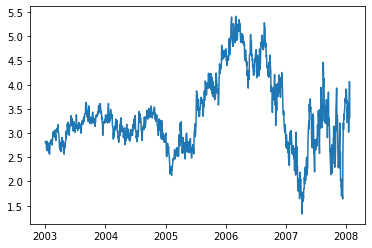

In [56]:
# Residuals
error = ewc_close - slope * ewa_close + intercept
plt.plot(error)
plt.show()

The residuals seem to have a long-term mean, however, we must test it first.

## 2. Testing for Cointegration

### Performing an ADF test 

$H_0: \text{Unit Root}$

In [57]:
ts.adfuller(error, 1)

(-3.345909043537594,
 0.012946975759472333,
 1,
 1273,
 {'1%': -3.435497317510684,
  '5%': -2.8638130956084464,
  '10%': -2.5679802172809003},
 -1017.697511768808)

P-value:  0.012946975759472333 therefore, we reject the null of unit root and can infer that the errors are stationary, therefore we can start to build a trading strateby by trading on the error.